![SpotifyxRVB](Spotify%20x%20RVB%20-%20Logo.png)

# <a><center> Spotify x Reverberation Radio - The essence of Cool </center></a>
<b>Author: Ulysse Zampogna</b>


The project consists in revealing the secrets of the best radio on earth (according to me): Reverberation radio. It is composed of a collective of artists (musicians, djs, record labels, visual artisits, etc.) based in Austin texas, regularly featuring guests apperarences from all over the world. The radio releases a show on a weekly basis. The music selection is excquisit and covers an eclectic range of music history. 

But what make this radio so special? Let's compare it with a few popular playlists on Spotify and try to define the Reverberation's essence of Cool. 

This Data Science project is broken down in 3 notebooks:
 - [Part 1](https://github.com/uzampogn/Spotify-x-Reverberation-The-essence-of-cool) uses [Spotipy API](https://spotipy.readthedocs.io/en/2.19.0/) to collect data from a dozen of playlists. 
 - [Part 2](https://github.com/uzampogn/Spotify-x-Reverberation-The-essence-of-cool) performs an exploratory data analysis to unveal the secrets of each playlist. 
 - [Part 3](https://github.com/uzampogn/Spotify-x-Reverberation-The-essence-of-cool) is a series of classifiers ([Naïve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) & [XGBoost](https://xgboost.readthedocs.io/en/stable/)) which takes any track and predicts the best matching playlist. Let's see if a given track could enter the exquisit Reverberation playlist.

---
# Executive summary:

Reverberation is special because of its:

   1. Eclectism. Reverberation features 10x more diversity than its benchmarcks and is specialized in niche genres.
   2. Richness. Reverberation contains 10 to 30x more tracks which spans 70+ years of music history.
   3. Niche. Collectable. Rarities. Reverberation has by far the lowest average track popularity. -73% less popular than other playlists on average.
   2. Happiness Concentrate. Finally, Reverberation shows a significantly higher valence than other playlist (+19% on average)
   
Currently Reverberation operates mainly from its [tumblr](https://reverberationradio.com/) which also features their personal website for merch (powered by Shopify), Apple Podcast, Instagram and Twitter accounts. Overall, their internet footprint is quite disparate which certainly influence their capacity of reaching a greater audience as well as converting these fans into financial support for the collective and its artists.

### Business case:

Developing Reverberation Radio visibility and activity on Spotify would help the collective consolidating their fanbase and monetize it seamingly. A few advantages Spotify proposes:

   1. 400+Mio monthly listeners with an extremely performant Machine Learning infrastructure enabling personalized discovery for every user. Reveberation could unleash the power of its unique selection to a greater audience of interest.
   
   
   2. By taking control of its fanbase, the radio could understand in details who composes their audience and most dedicated fans. This first step consistutes the basis for developing further the reverberation brand and activities. 
   
   
   3. Reverberation could promote its merchandise and connect directly its existing Shopify account on Spotify. Effectively centralizing its fanbase analytics and merchandise activities. And enabling a seamless shoping experience, directly from the streaming platform users utilize daily.
   
   
   4. Reverberation could turn their collectable/rarities trademark by proposing through Spotify services limited/collector items - including merch, records or web3 tokens. Especially because the radio has tight links with successful designers and visual artists (for example [Jaime Zu](https://jaimezu.bigcartel.com/)) which is clearly recognizable when browsing through their tumblr or merch selection. In short,  exciting artistic and business opportunities emerge when considering the whole eco-system.
   

Finaly, Reveberation is one of many small communities of independent artists that can greatly benefit from the breadth of services proposed by Spotify while continuing to focus on what matters the most - its art. Many communities like these exist all over the world. The best example of artistic and business success is the infamous *King Gizzard and The Lizzard Wizard* band with its Flightless Records. A true masterclass of turning an independent band/label into a success story.

---
# Part 2: Exploratory Data Analysis

Objective: Explore each playlist uniqueness to unveal the specifities of Reverbation selection.

### Table of content <a name="00"></a>

1. <a href='#1'>Basic exploration</a>
2. <a href='#2'>Explore categorial variables</a><br>
   2.1 Track distribution across time (decades) - <a href='#2.1'>Analysis - Decades</a><br>
   2.2 Track distribution across genres - <a href='#2.2'>Analysis - Genres</a><br>
3. <a href='#3'>Explore continuous variables</a><br>
   3.1 Radar chart based on audio features - <a href='#3.1'>Analysis - Audio Features</a><br>
   3.2 Pairplot based on audio features - <a href='#3.2'>Analysis - Correlation</a><br>
4. <a href='#4'>Appendix</a><br>
   4.1 Spotify Audio Features description<br>
   4.2 Pairplot of continuous variables<br>
   
 ---

#### Settings

In [82]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set(style="ticks", context="poster")
plt.style.use("seaborn-poster")
%autosave 30

Autosaving every 30 seconds


In [83]:
# Initiating color mapping to ensure consistency across all further visualizations

#https://matplotlib.org/stable/gallery/color/named_colors.html
pl_mapping = {
 "Today's Top Hits":'tab:blue',
 'Your Favorite CoffeeHouse':'tab:orange',
 'RapCaviar':'tab:green',
 'Viva Latino':'gold',
 'Hot Country':'tab:purple',
 'New Music Friday':'tab:brown',
 'Peaceful Piano':'tab:pink',
 'Are & Be':'tab:gray',
 'Mint':'tab:olive',
 'Just Hits':'tab:cyan',
 'Soft Pop Hits':'lime',
 'All Out 2000s':'royalblue',
 'Reverberation':'crimson'
}

---
## 1. Basic exploration <a name='1'></a>

In [84]:
df = pd.read_csv('../data/rvb_data.csv', sep=',')
df.head()

playlist                      id                       name  \
0  Today's Top Hits  3USxtqRwSYz57Ewm6wWRMp                 Heat Waves   
1  Today's Top Hits  5HCyWlXZPP0y6Gqq8TgA20  STAY (with Justin Bieber)   
2  Today's Top Hits  6zSpb8dQRaw0M1dK8PBwQz    Cold Heart - PNAU Remix   
3  Today's Top Hits  0gplL1WMoJ6iYaPgMCL0gX                 Easy On Me   
4  Today's Top Hits  4fouWK6XVHhzl78KzQ1UjL                    abcdefu   

                       album         artist  \
0                  Dreamland  Glass Animals   
1  STAY (with Justin Bieber)  The Kid LAROI   
2    Cold Heart (PNAU Remix)     Elton John   
3                 Easy On Me          Adele   
4                    abcdefu          GAYLE   

                                          genres release_date  popularity  \
0    ['gauze pop', 'indietronica', 'shiver pop']   2020-08-07          90   
1                         ['australian hip hop']   2021-07-09          97   
2     ['glam rock', 'mellow gold', 'piano rock']   2021-08-13          96   
3  ['british soul', 'pop', 'pop soul', 'uk pop']   2021-10-14          97   
4                     ['modern alternative pop']   2021-08-13         100   

   acousticness  danceability  ...  valence  instrumentalness  liveness  \
0         0.440         0.761  ...    0.531         6.700e-06     0.092   
1         0.038         0.591  ...    0.478         0.000e+00     0.103   
2         0.034         0.796  ...    0.942         4.190e-05     0.095   
3         0.578         0.604  ...    0.130         0.000e+00     0.133   
4         0.299         0.695  ...    0.415         0.000e+00     0.367   

   loudness  speechiness    tempo  time_signature  duration_ms  mode  \
0    -6.900        0.094   80.870               4       238805     1   
1    -5.484        0.048  169.928               4       141805     1   
2    -6.312        0.032  116.032               4       202735     1   
3    -7.519        0.028  141.981               4       224694     1   
4    -5.692        0.049  121.932               4       168601     1   

             type  
0  audio_features  
1  audio_features  
2  audio_features  
3  audio_features  
4  audio_features  

[5 rows x 21 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist          2566 non-null   object 
 1   id                2566 non-null   object 
 2   name              2566 non-null   object 
 3   album             2566 non-null   object 
 4   artist            2566 non-null   object 
 5   genres            2566 non-null   object 
 6   release_date      2566 non-null   object 
 7   popularity        2566 non-null   int64  
 8   acousticness      2566 non-null   float64
 9   danceability      2566 non-null   float64
 10  energy            2566 non-null   float64
 11  valence           2566 non-null   float64
 12  instrumentalness  2566 non-null   float64
 13  liveness          2566 non-null   float64
 14  loudness          2566 non-null   float64
 15  speechiness       2566 non-null   float64
 16  tempo             2566 non-null   float64


In [86]:
df.describe()

popularity  acousticness  danceability    energy    valence  \
count    2566.000     2.566e+03      2566.000  2566.000  2.566e+03   
mean       35.966     3.542e-01         0.592     0.573  5.646e-01   
std        30.434     3.162e-01         0.155     0.207  2.432e-01   
min         0.000     8.530e-06         0.086     0.007  1.000e-05   
25%         6.000     5.662e-02         0.484     0.425  3.792e-01   
50%        32.000     2.560e-01         0.602     0.586  5.720e-01   
75%        62.000     6.240e-01         0.704     0.734  7.680e-01   
max       100.000     9.950e-01         0.975     0.994  9.860e-01   

       instrumentalness  liveness  loudness  speechiness     tempo  \
count         2.566e+03  2566.000  2566.000     2566.000  2566.000   
mean          1.639e-01     0.172    -9.367        0.063   117.847   
std           2.953e-01     0.138     4.225        0.063    27.450   
min           0.000e+00     0.023   -33.522        0.023    46.591   
25%           1.570e-06     0.093   -11.795        0.032    96.859   
50%           8.425e-04     0.118    -8.599        0.041   116.703   
75%           1.608e-01     0.198    -6.189        0.061   134.014   
max           9.770e-01     0.977    -1.538        0.659   206.122   

       time_signature  duration_ms      mode  
count        2566.000    2.566e+03  2566.000  
mean            3.933    2.210e+05     0.666  
std             0.340    7.850e+04     0.472  
min             1.000    4.000e+04     0.000  
25%             4.000    1.730e+05     0.000  
50%             4.000    2.039e+05     1.000  
75%             4.000    2.484e+05     1.000  
max             5.000    1.001e+06     1.000

##### Group variables in Categorical and Continuous:

In [87]:
categorical = df.select_dtypes(include=['object']).columns.tolist()

print('Number of Categorical variables: {} '.format(len(categorical)))
print(categorical)

print('\n')

continuous = df.select_dtypes(exclude=['object']).columns.tolist()

print('Number of Continuous variables: {}'.format(len(continuous)))
print(continuous)

Number of Categorical variables: 8 
['playlist', 'id', 'name', 'album', 'artist', 'genres', 'release_date', 'type']


Number of Continuous variables: 13
['popularity', 'acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'duration_ms', 'mode']


##### Count tracks per playlist:

In [88]:
df.groupby('playlist').id.nunique().sort_values(ascending=False)

playlist
Reverberation                1597
All Out 2000s                 150
Your Favorite CoffeeHouse     125
Mint                          100
New Music Friday              100
Soft Pop Hits                 100
Just Hits                      87
Hot Country                    52
Are & Be                       50
Peaceful Piano                 50
RapCaviar                      50
Today's Top Hits               50
Viva Latino                    50
Name: id, dtype: int64

---
## 2. Explore - Categorical Variables  <a name='2'></a>

In [89]:
cat_var = ['playlist', 'id', 'name', 'album', 'artist', 'genres', 'release_date']
# NB: excluding "type" which doesn't hold useful information

### 2.1. Explore track distribution across time (release_dates grouped by decades)

In [90]:
df.groupby('playlist')['release_date'].agg({min,max})

max         min
playlist                                         
All Out 2000s              2018-03-02        1999
Are & Be                   2022-01-14  2020-12-04
Hot Country                2022-01-14  2019-09-27
Just Hits                  2022-01-21  2017-06-23
Mint                       2022-01-21  2021-03-24
New Music Friday           2022-01-21  2022-01-16
Peaceful Piano             2022-01-20  2014-11-28
RapCaviar                  2022-01-21  2020-12-25
Reverberation              2021-03-07  1956-10-19
Soft Pop Hits              2021-10-14  2000-07-10
Today's Top Hits           2022-01-20  2014-11-28
Viva Latino                2022-01-21  2020-11-27
Your Favorite CoffeeHouse  2021-12-31  2005-01-25

#### Group release_dates into decades

In [91]:
# Release_date is treated as an object type. Let's transform it ot datetime.
df['release_date'] = pd.to_datetime(df.release_date)
#df.info()

# Extract Year from release_date
df['year'] = df.release_date.dt.year
df['release_decade'] = df.year.apply(lambda row: str(row)[:2]+str(row)[2]+'0s')

# Check if new column has been created
#df.columns

#### Vizualize the distribution of tracks across decades for each playlist

In [92]:
decade_agg = df.groupby(['playlist','release_decade']).agg({'id':'size'})
# the output of a groupby is a multi index series
# Caclulate the percentage of total, group by the previously obtained series at the lowest level
# apply lambda to divide each lowest level by its group sum
decade_agg = decade_agg.groupby(level=0).apply(lambda x: round(100 * x / x.sum(),1)).reset_index()
decade_agg.rename(columns={'id':'Percentage of Total'},inplace=True)
decade_pivot = decade_agg.pivot(index='playlist',columns='release_decade',values="Percentage of Total").fillna(0)

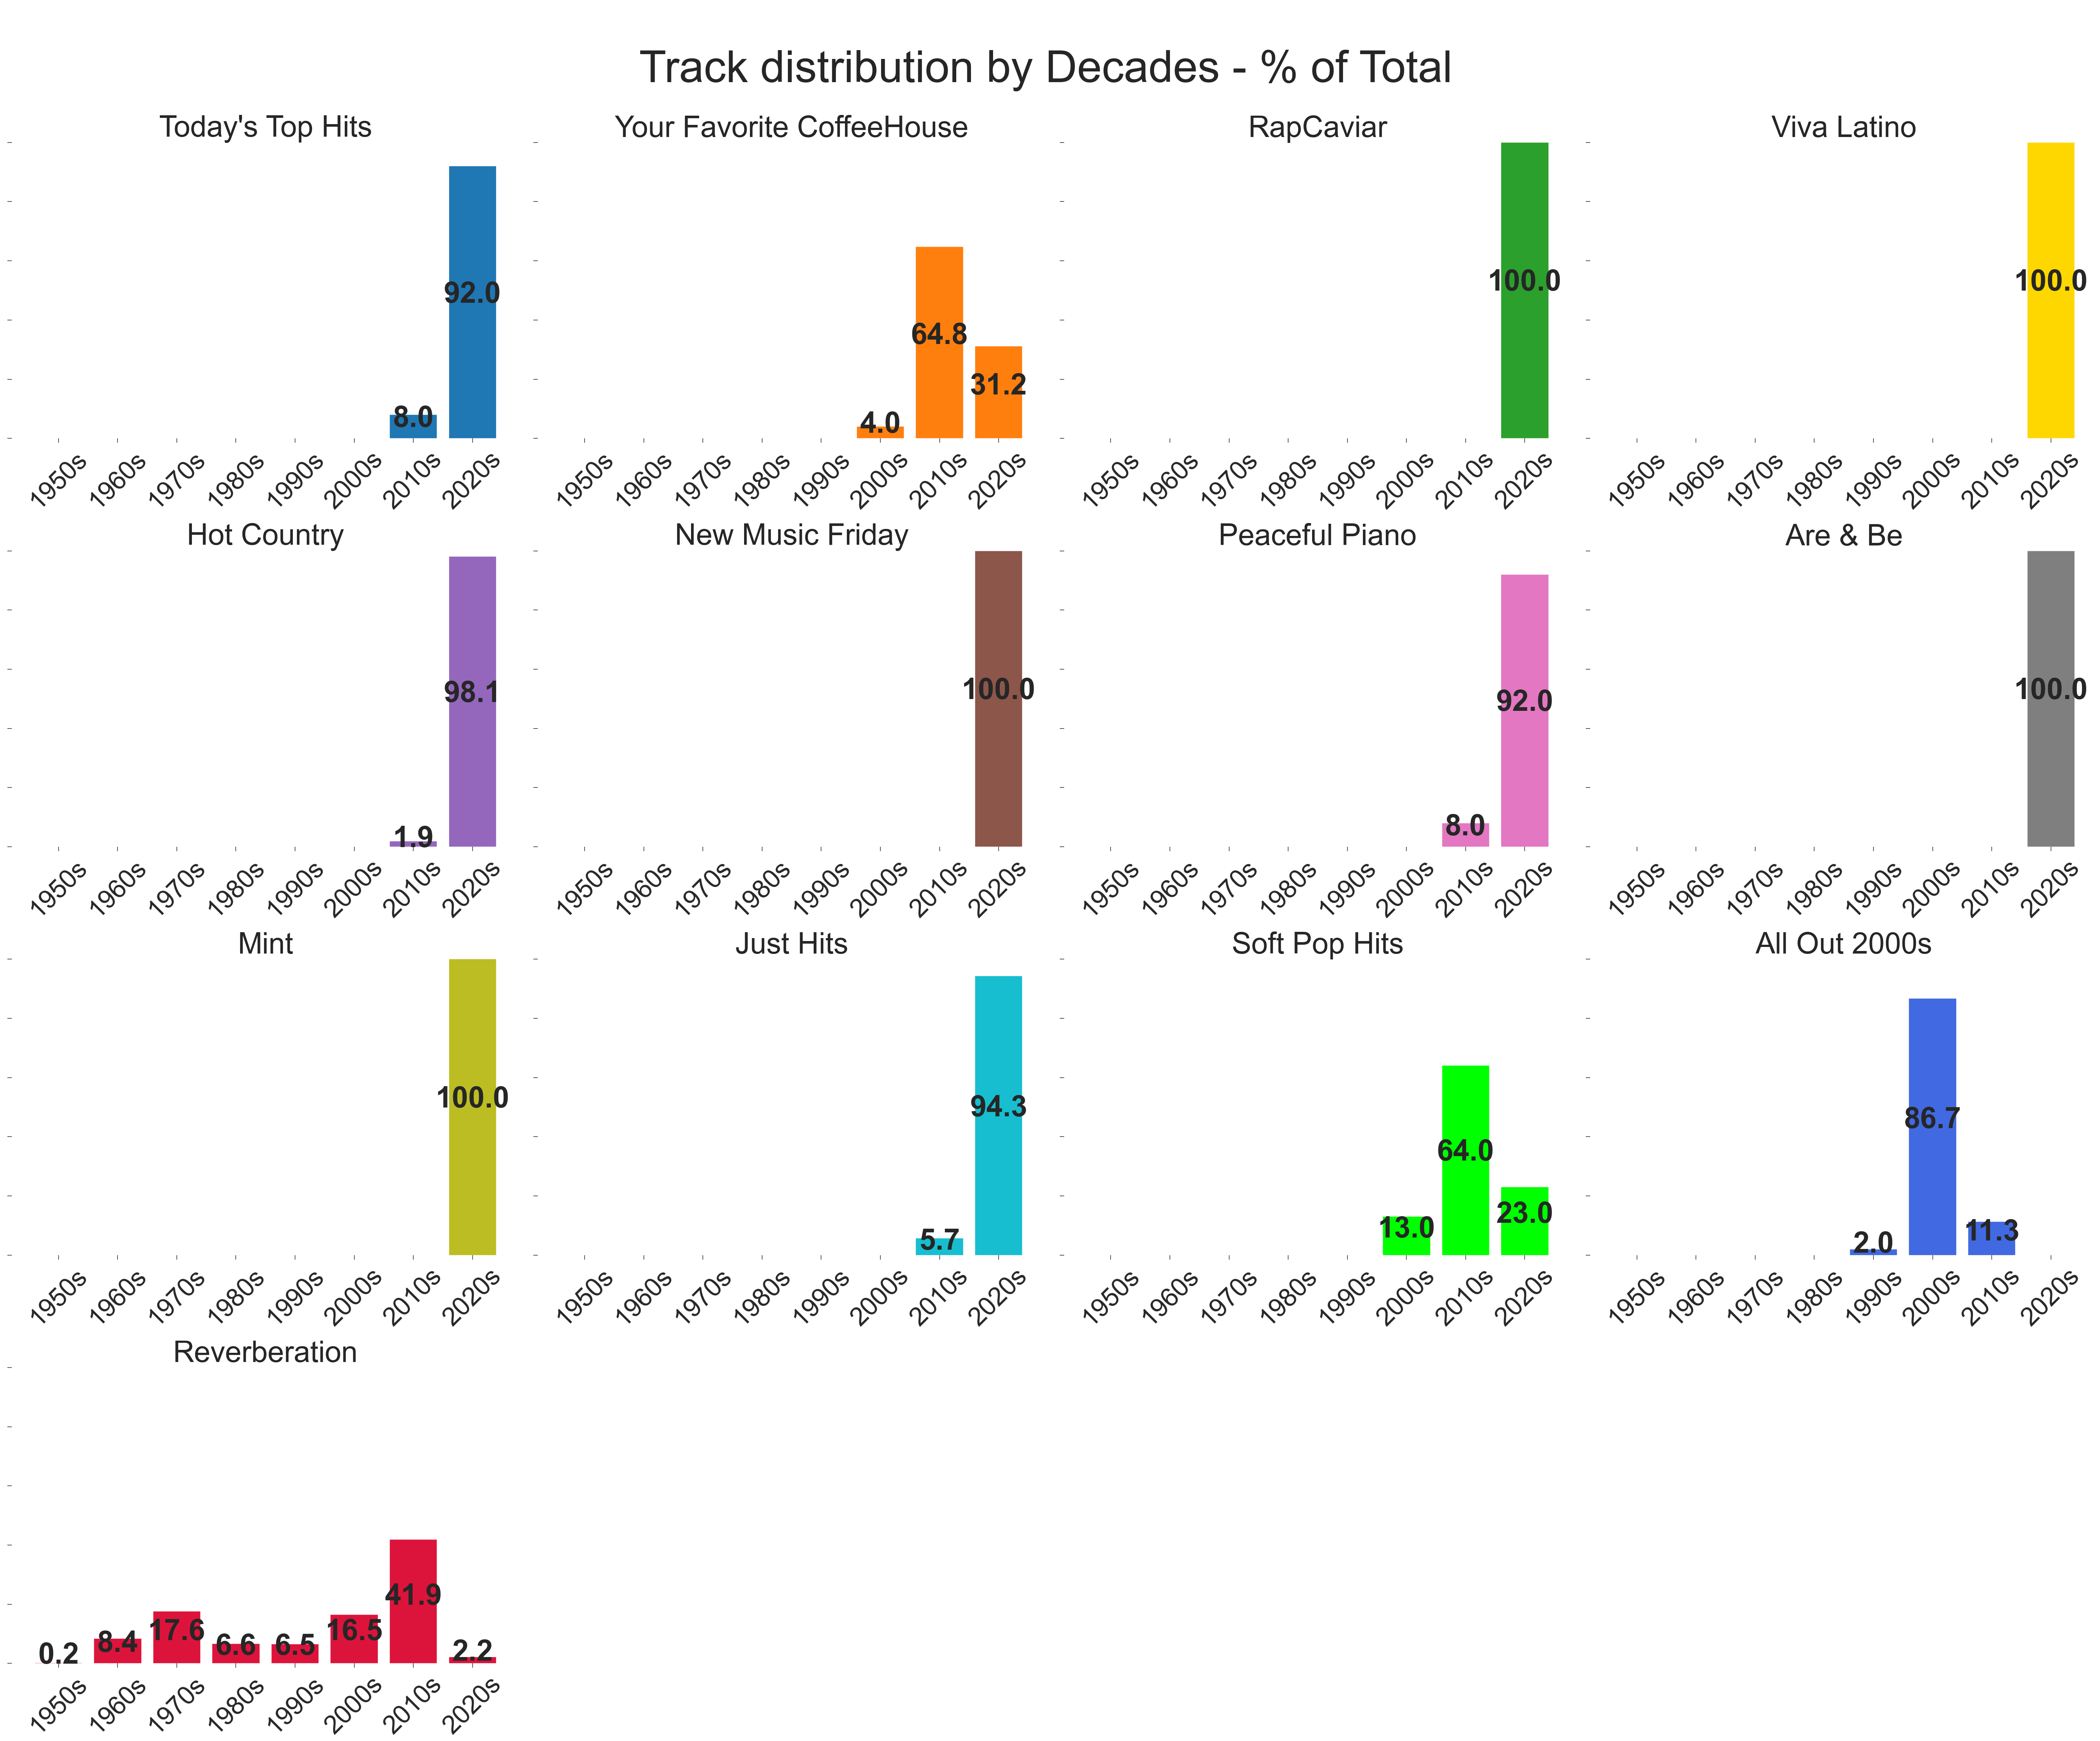

In [93]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        if y[i] > 0:
            plt.text(i,y[i]//2,y[i], ha='center', fontsize=80, fontweight='bold')# fontdict={'font.size': 80,'font.weight':'bold'})

# List of unique playlist
pls = df['playlist'].unique().tolist()

# Build bar charts
fig=plt.figure(figsize=(80,80))

for index_subplot,pl in enumerate(pls,1):
    # setting up variables
    tmp = decade_pivot.loc[pl]
    x = tmp.index
    y = tmp.values
    
    # adding subplot
    ax = fig.add_subplot(5,4,index_subplot)
    plt.tight_layout()
    plt.bar(x,y,color=pl_mapping[pl])
    #sns.barplot(x=tmp.index,y=tmp.values,data=tmp)
    
    # set axis & legend
    fig.suptitle('\n Track distribution by Decades - % of Total \n', fontsize=120)

    ax.set_title(tmp.name)
    ax.title.set_size(80)
    
    plt.xticks(size=70)
    plt.xticks(rotation=45)
    plt.yticks(size=0)
    plt.ylim([0,100])
    
    # remove frame
    for edge in ['top','right','bottom','left']:
        ax.spines[edge].set_visible(False)
    
    # add Percentage of Total on each bar
    addlabels(x,y)
    #plt.rcParams.update({'font.size': 80,'font.weight':'bold'})

#plt.savefig('SxR_Track_Distribution_by_Decades.png', format='png', orientation='landscape')
plt.show()

#### Analysis - By Decades: <a name='2.1'></a>
   
   * As a reminder, 12 playlists were selected among the most popular playlists on Spotify for 2021. They will serve as benchmark against our target playlist: Reveberation Radio.
   * At the first glance, it's clear that most playlists are very specialized. Some contains as few as 50 tracks and cover between 1 to 3 decades at most.
   * In contrary, Reverberation proposes a selection of 1500+ tracks spanning 8 decades or 70+ years of music history. It demonstrates the ecclectism which makes this radio so enjoyable to me. 
   * It's also quite interesting to notice that 42% of Reverberation tracks were released in 2010s. Meaning, the selection blends recent releases, which consistutes its basis, with connections to somehow distant past. This particularility is a trait I enjoy very much. Connecting the unconnected.
   
#### Side Note:
   * On a Machine Learning standpoint, the decades field will be a valuable predicator in Part 3 to classify a new track in one of the playlist.
   
<a href='#00'>(Go to Table of Content)</a>

---
### 2.2. Explore track distribution per Genres

The Genres collected via Spotipy consists of a python list containing multiple entries for each track. This data structure create an opportunity and a challenge.

The opportunity is having access to detailed sub genres. However, the cardinality of this field consistutes a challenge when analyzing many tracks with each many genres. Essentially, making it difficult to exploit in an analytical and classification model framework. 

Hence, we need to process further the data for our needs. We'll first extract the first genre per track and store it in a new column called "Style". Then we will extract major genres from this unique string.

In [94]:
df['style'] = df.genres.apply(lambda row: row.split(',')[0] if ',' in row else row)\
                .replace("[\(['{}')\]]", '',regex=True)
print(f"After selecting only the first genres, we succeeded to reduce the cardinality of style to:\
      \n {len(df['style'].unique())}")

After selecting only the first genres, we succeeded to reduce the cardinality of style to:      
 497


In [95]:
print(f"NB: \nGenres contains empty lists: {len(df[(df.playlist=='Reverberation') & (df['genres']=='[]')])}")
print(f"These rows become NaN in the style field: {len(df[(df.playlist=='Reverberation') & (df['style']=='')])}")

NB: 
Genres contains empty lists: 394
These rows become NaN in the style field: 394


In [96]:
df_distinct_style = df.groupby(by='playlist').agg({'style':'nunique'}).reset_index()
df_distinct_style.rename(columns={'style':'style_count'},inplace=True)
df_distinct_style.sort_values(by='style_count',ascending=False,inplace=True)
df_distinct_style.reset_index(drop=True)
print(f'Reverberation features {df_distinct_style[df_distinct_style.playlist=="Reverberation"].style_count.values[0]} different styles.')
print(f'Others playlists feature on average {np.mean(df_distinct_style[~(df_distinct_style.playlist=="Reverberation")].style_count.values)} different styles.')

Reverberation features 324 different styles.
Others playlists feature on average 31.25 different styles.


In [97]:
# Examples of style in Reverberation
df[df.playlist.isin(['Reverberation'])]['style'].unique()[:11]

array(['alternative rock', 'art rock', 'disco', 'synthpop',
       'cumbia salvadorena', 'shibuya-kei', 'berlin school',
       'neo-psychedelic', '', 'jazz saxophone', 'art pop'], dtype=object)

##### Get the Top 5 genres per playlist

In [98]:
style_agg = df.groupby(by=['playlist','style']).size().reset_index(name='Count')\
            .sort_values(['playlist','Count'],ascending=False)
filter_top5 = list(style_agg.groupby(by=['playlist']).Count.nlargest(5).index.get_level_values(1))
style_agg.filter(items=filter_top5, axis=0)

playlist                      style  Count
20               All Out 2000s                  dance pop     74
7                All Out 2000s              barbadian pop     10
6                All Out 2000s                atl hip hop      5
12               All Out 2000s               british soul      5
13               All Out 2000s            bubblegum dance      5
36                    Are & Be            alternative r&b     15
40                    Are & Be                  dance pop      7
44                    Are & Be                        pop      7
33                    Are & Be                                 3
38                    Are & Be  canadian contemporary r&b      3
51                 Hot Country       contemporary country     37
46                 Hot Country                                 3
50                 Hot Country            black americana      3
48                 Hot Country                      alt z      2
49                 Hot Country         australian country      2
68                   Just Hits                  dance pop     29
87                   Just Hits                        pop      8
82                   Just Hits                modern rock      5
62                   Just Hits                   big room      4
66                   Just Hits  canadian contemporary r&b      3
107                       Mint                  dance pop     20
90                        Mint                                 8
115                       Mint                        edm      8
97                        Mint                 bass house      6
109                       Mint          deep groove house      5
133           New Music Friday                                12
160           New Music Friday                  dance pop      6
139           New Music Friday                      alt z      5
144           New Music Friday                    art pop      5
186           New Music Friday     modern alternative pop      3
210             Peaceful Piano                  dance pop      6
196             Peaceful Piano                                 4
224             Peaceful Piano                        pop      4
219             Peaceful Piano             lgbtq+ hip hop      3
197             Peaceful Piano                   afro r&b      2
228                  RapCaviar                atl hip hop      7
237                  RapCaviar                florida rap      6
232                  RapCaviar                chicago rap      5
239                  RapCaviar                    hip hop      5
241                  RapCaviar                melodic rap      4
248              Reverberation                               394
267              Reverberation           alternative rock     58
283              Reverberation                   art rock     55
315              Reverberation                 bossa nova     43
262              Reverberation                 album rock     42
587              Soft Pop Hits                  dance pop     23
599              Soft Pop Hits                        pop     19
575              Soft Pop Hits                      alt z      6
582              Soft Pop Hits               british soul      6
586              Soft Pop Hits       contemporary country      6
614           Today's Top Hits                  dance pop      6
600           Today's Top Hits                                 4
628           Today's Top Hits                        pop      4
623           Today's Top Hits             lgbtq+ hip hop      3
601           Today's Top Hits                   afro r&b      2
639                Viva Latino                      latin     21
632                Viva Latino          argentine hip hop      3
635                Viva Latino              colombian pop      3
637                Viva Latino                    corrido      2
638                Viva Latino                  dance pop      2
682  Your Favorite CoffeeHouse                 indie folk

#### Impute Mode for NaN values

In [99]:
# Retrieve Mode by playlist
filter_mode = list(style_agg[style_agg['style']!= ''].groupby('playlist').Count.nlargest(1).index.get_level_values(1))
mode_per_playlist = style_agg.filter(items=filter_mode,axis=0).values.tolist()

# Impute Mode to NaN values in original df
def impute_mode(cols):
    for mode in mode_per_playlist:
        if mode[0] == cols['playlist'] and cols['style'] == "":
            return mode[1]
    return cols['style']

style_agg['style'] = style_agg.apply(lambda cols: impute_mode(cols),axis=1)

In [100]:
mode_per_playlist

[['All Out 2000s', 'dance pop', 74],
 ['Are & Be', 'alternative r&b', 15],
 ['Hot Country', 'contemporary country', 37],
 ['Just Hits', 'dance pop', 29],
 ['Mint', 'dance pop', 20],
 ['New Music Friday', 'dance pop', 6],
 ['Peaceful Piano', 'dance pop', 6],
 ['RapCaviar', 'atl hip hop', 7],
 ['Reverberation', 'alternative rock', 58],
 ['Soft Pop Hits', 'dance pop', 23],
 ["Today's Top Hits", 'dance pop', 6],
 ['Viva Latino', 'latin', 21],
 ['Your Favorite CoffeeHouse', 'indie folk', 25]]

In [101]:
#(style_agg.apply(lambda col: 
#                [mode[1] for mode in mode_per_playlist 
#                 if (
#                     mode[0]==col['playlist'] 
#                     and 
#                     col['style'] == "") 
#                ][0]
#                ,axis=1)
#)

In [102]:
style_agg.isna().sum()

playlist    0
style       0
Count       0
dtype: int64

In [103]:
style_agg[style_agg['playlist']=='Viva Latino']

playlist                           style  Count
639  Viva Latino                           latin     21
632  Viva Latino               argentine hip hop      3
635  Viva Latino                   colombian pop      3
637  Viva Latino                         corrido      2
638  Viva Latino                       dance pop      2
643  Viva Latino                puerto rican pop      2
645  Viva Latino                       reggaeton      2
647  Viva Latino                  trap argentino      2
648  Viva Latino                    trap boricua      2
631  Viva Latino                           latin      1
633  Viva Latino                         bachata      1
634  Viva Latino                        big room      1
636  Viva Latino  concurso de talentos argentino      1
640  Viva Latino                       latin pop      1
641  Viva Latino                         norteno      1
642  Viva Latino                   pop argentino      1
644  Viva Latino                  r&b en espanol      1
646  Viva Latino            reggaeton colombiano      1
649  Viva Latino                 trap colombiano      1
650  Viva Latino                  urbano espanol      1

#### Reduce further the cardinality

In [104]:
# 16 selected major genres from the Top 5 genres per playlist
major_genres = ['latin','hip hop','rock','soul','r&b'\
              ,'edm','rap','folk','indie','country'\
              ,'americana','house','alt z','pop','bossa nova','reggaeton']

In [105]:
def major_mapping(row):
    for major in major_genres:
        if major in row:
            return major
    return 'Others'

style_agg['major_genres'] = style_agg['style'].apply(lambda row: major_mapping(row))

In [106]:
style_agg.tail()

playlist        style  Count major_genres
26  All Out 2000s       lilith      1       Others
27  All Out 2000s  modern rock      1         rock
28  All Out 2000s   neo mellow      1       Others
29  All Out 2000s     neo soul      1         soul
32  All Out 2000s     pop rock      1         rock

In [107]:
major_genres_agg = (style_agg.groupby(['playlist','major_genres'])
                 .agg({'Count':'sum'})[['Count']]
                 .groupby(level=0)
                 .apply(lambda x: round(100*x/x.sum(),1))
                 .sort_values(by=['playlist','Count'],ascending=False)
                 .rename(columns={'Count':'% of Total'})
                 .reset_index()
)

In [108]:
major_genres_agg.head()

playlist major_genres  % of Total
0  Your Favorite CoffeeHouse         folk        43.2
1  Your Favorite CoffeeHouse          pop        16.0
2  Your Favorite CoffeeHouse    americana        14.4
3  Your Favorite CoffeeHouse        indie        12.0
4  Your Favorite CoffeeHouse       Others         8.8

### Visualize genres distribution per playlist

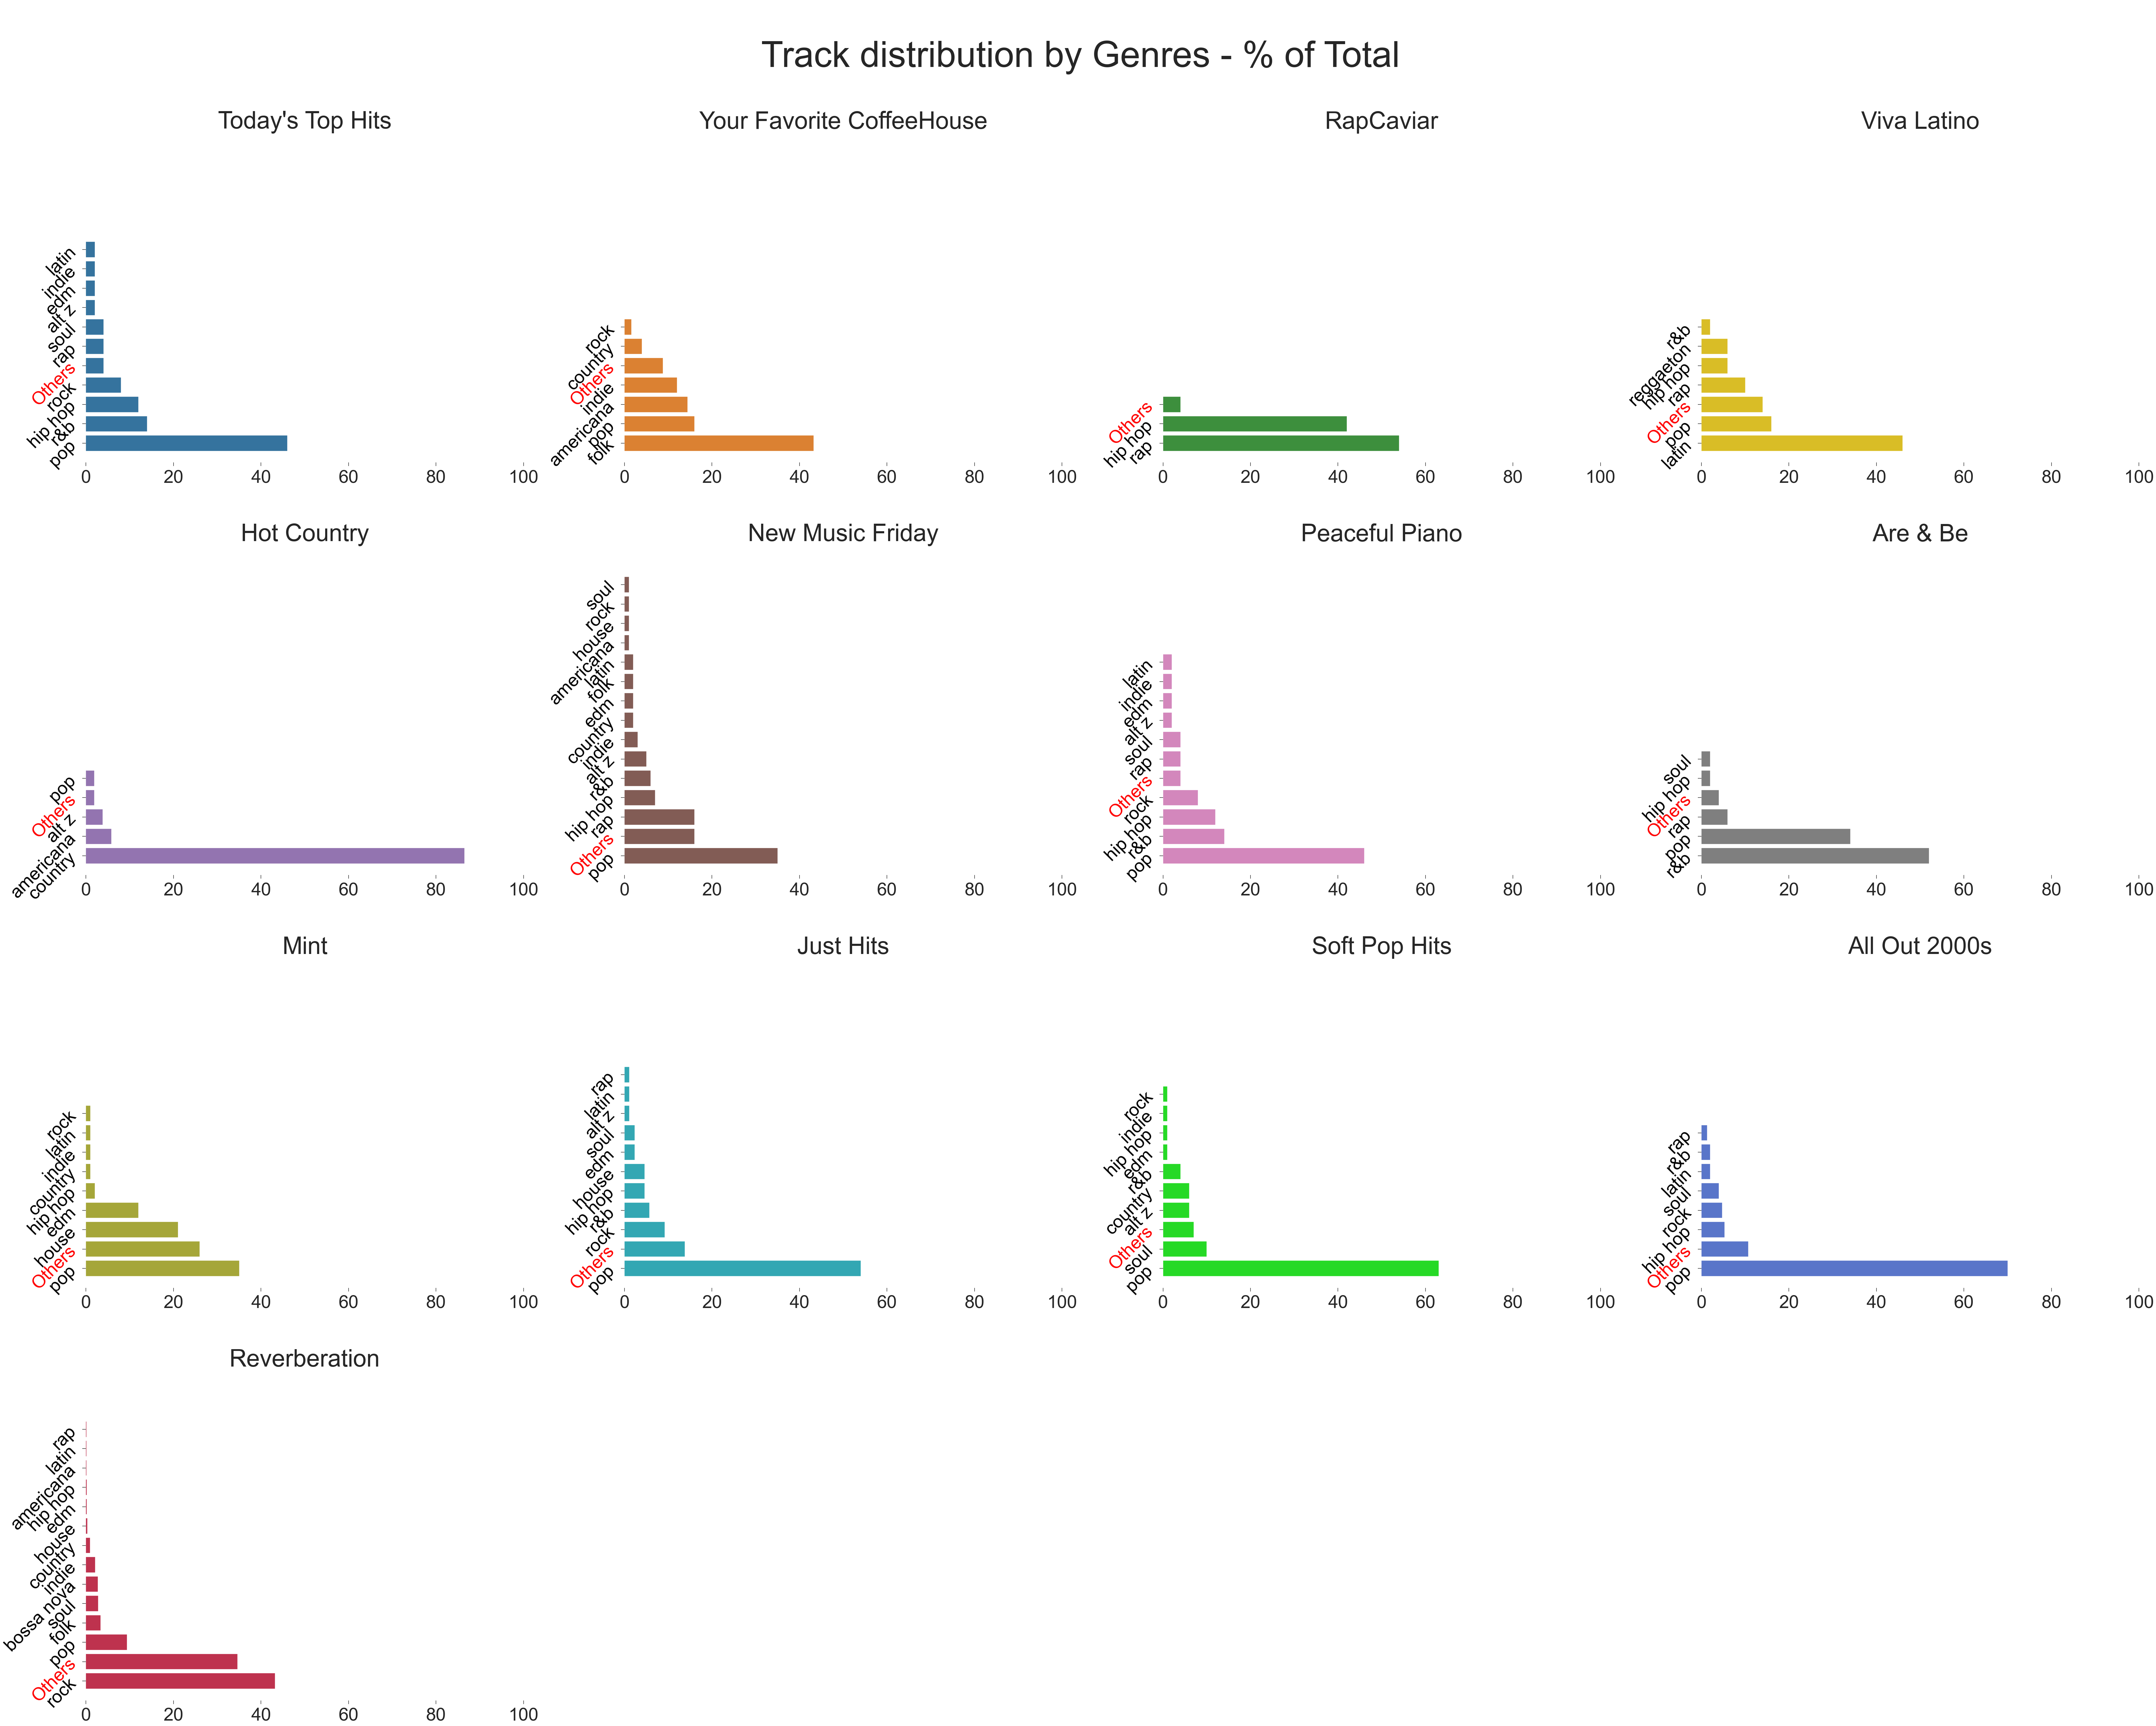

In [109]:
# List of unique playlist
pls = df['playlist'].unique().tolist()

# Create color mapping to highlight the "Others" genres bucket
label_color_mapping = {}
label_color_mapping['Others'] = 'red'

for m in major_genres:
    label_color_mapping[m] = 'black'

# Build bar charts
fig=plt.figure(figsize=(100,100))

for index_subplot,pl in enumerate(pls,1):
    # setting up variables
    tmp = major_genres_agg[major_genres_agg.playlist==pl]
    x = tmp['major_genres']
    y = tmp['% of Total']
    
    # adding subplot
    ax = fig.add_subplot(5,4,index_subplot)
    plt.tight_layout()
    
    # Seaborn implementation
    (sns.barplot(x='% of Total'
                 ,y='major_genres'
                 ,data=tmp[['major_genres','% of Total']] 
                 ,color=pl_mapping[pl]
                 ,saturation=0.7
                #,dodge=False
                )
    )
    
    # set axis & legend
    fig.suptitle('\n Track distribution by Genres - % of Total \n', fontsize=120)

    ax.set_title('\n'+pl)
    ax.title.set_size(80)
    
    plt.xticks(size=60)
    plt.yticks(size=60)
    plt.yticks(rotation=45)
    
    plt.xlim([0,100])
    plt.ylim([-1,16])
    
    for ytick in ax.get_yticklabels():
        ytick.set_color(label_color_mapping[ytick.get_text()])
    
    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    
    # remove frame
    for edge in ['top','right','bottom','left']:
        ax.spines[edge].set_visible(False)

#plt.savefig('SxR_Track_Distribution_by_Genres.png', format='png', orientation='landscape')
plt.show()

#### Analysis - Genres: <a name='2.2'></a>

Introductory note: 
* I introduced 2 notions here: Style and Genres. Style are sub-categories of genres - for example art pop is a style of the genre pop.
* The Genres collected via Spotipy consists of a python list containing multiple entries for each track. This data structure create an opportunity and a challenge.

    The opportunity is having access to detailed sub genres. However, the cardinality of this field consistutes a challenge when analyzing many tracks with each many genres. Essentially, making it difficult to exploit in an analytical and classification model framework. 

    Hence, we need to process further the data for our needs. We'll first extract the first genre per track and store it in a new column called "Style". Then we will extract major genres from this unique string.

Analysis:

1. Reverberation features **324** different styles. The others playlists feature on average <b>31.25</b> different styles. Or a 10:1 ratio. Here is a sample of styles represented in Reverberation: 
        ['alternative rock', 'art rock','disco', 'synthpop','cumbia salvadorena', 'shibuya-kei', 'berlin school','neo-psychedelic', '', 'jazz saxophone', 'art pop']
        
2. The genre diversity is confirmed by the *'Track distribution by Genres - % of Total'* chart above. As 30+% tracks fall under "Others" genres - the highest % for 'Others' across all playlists. That is, a third of Reverberation explores niche genres.<br><br>

3. Another interesting point is the heavy specialization of other playlist. Earlier we saw most playlists cover only 1-3 decades. Now, we also know that they cover very specific genres. Which makes sense. On the other hand, Reverberation is mainly focused on Rock with approx. 40% of its selection and just behind, 'Others' genres revealing the second main feature of Reveberation - the discovery.




<a href='#00'>(Go to Table of Content)</a>

---

## 3. Explore - Continuous Variables <a name='3'></a>

### Explore duration distribution per playlist

In [110]:
#Transform duration unit from millisecond to minutes for readibility
df['duration_min'] = df.duration_ms/(1000*60)

In [111]:
pls

["Today's Top Hits",
 'Your Favorite CoffeeHouse',
 'RapCaviar',
 'Viva Latino',
 'Hot Country',
 'New Music Friday',
 'Peaceful Piano',
 'Are & Be',
 'Mint',
 'Just Hits',
 'Soft Pop Hits',
 'All Out 2000s',
 'Reverberation']

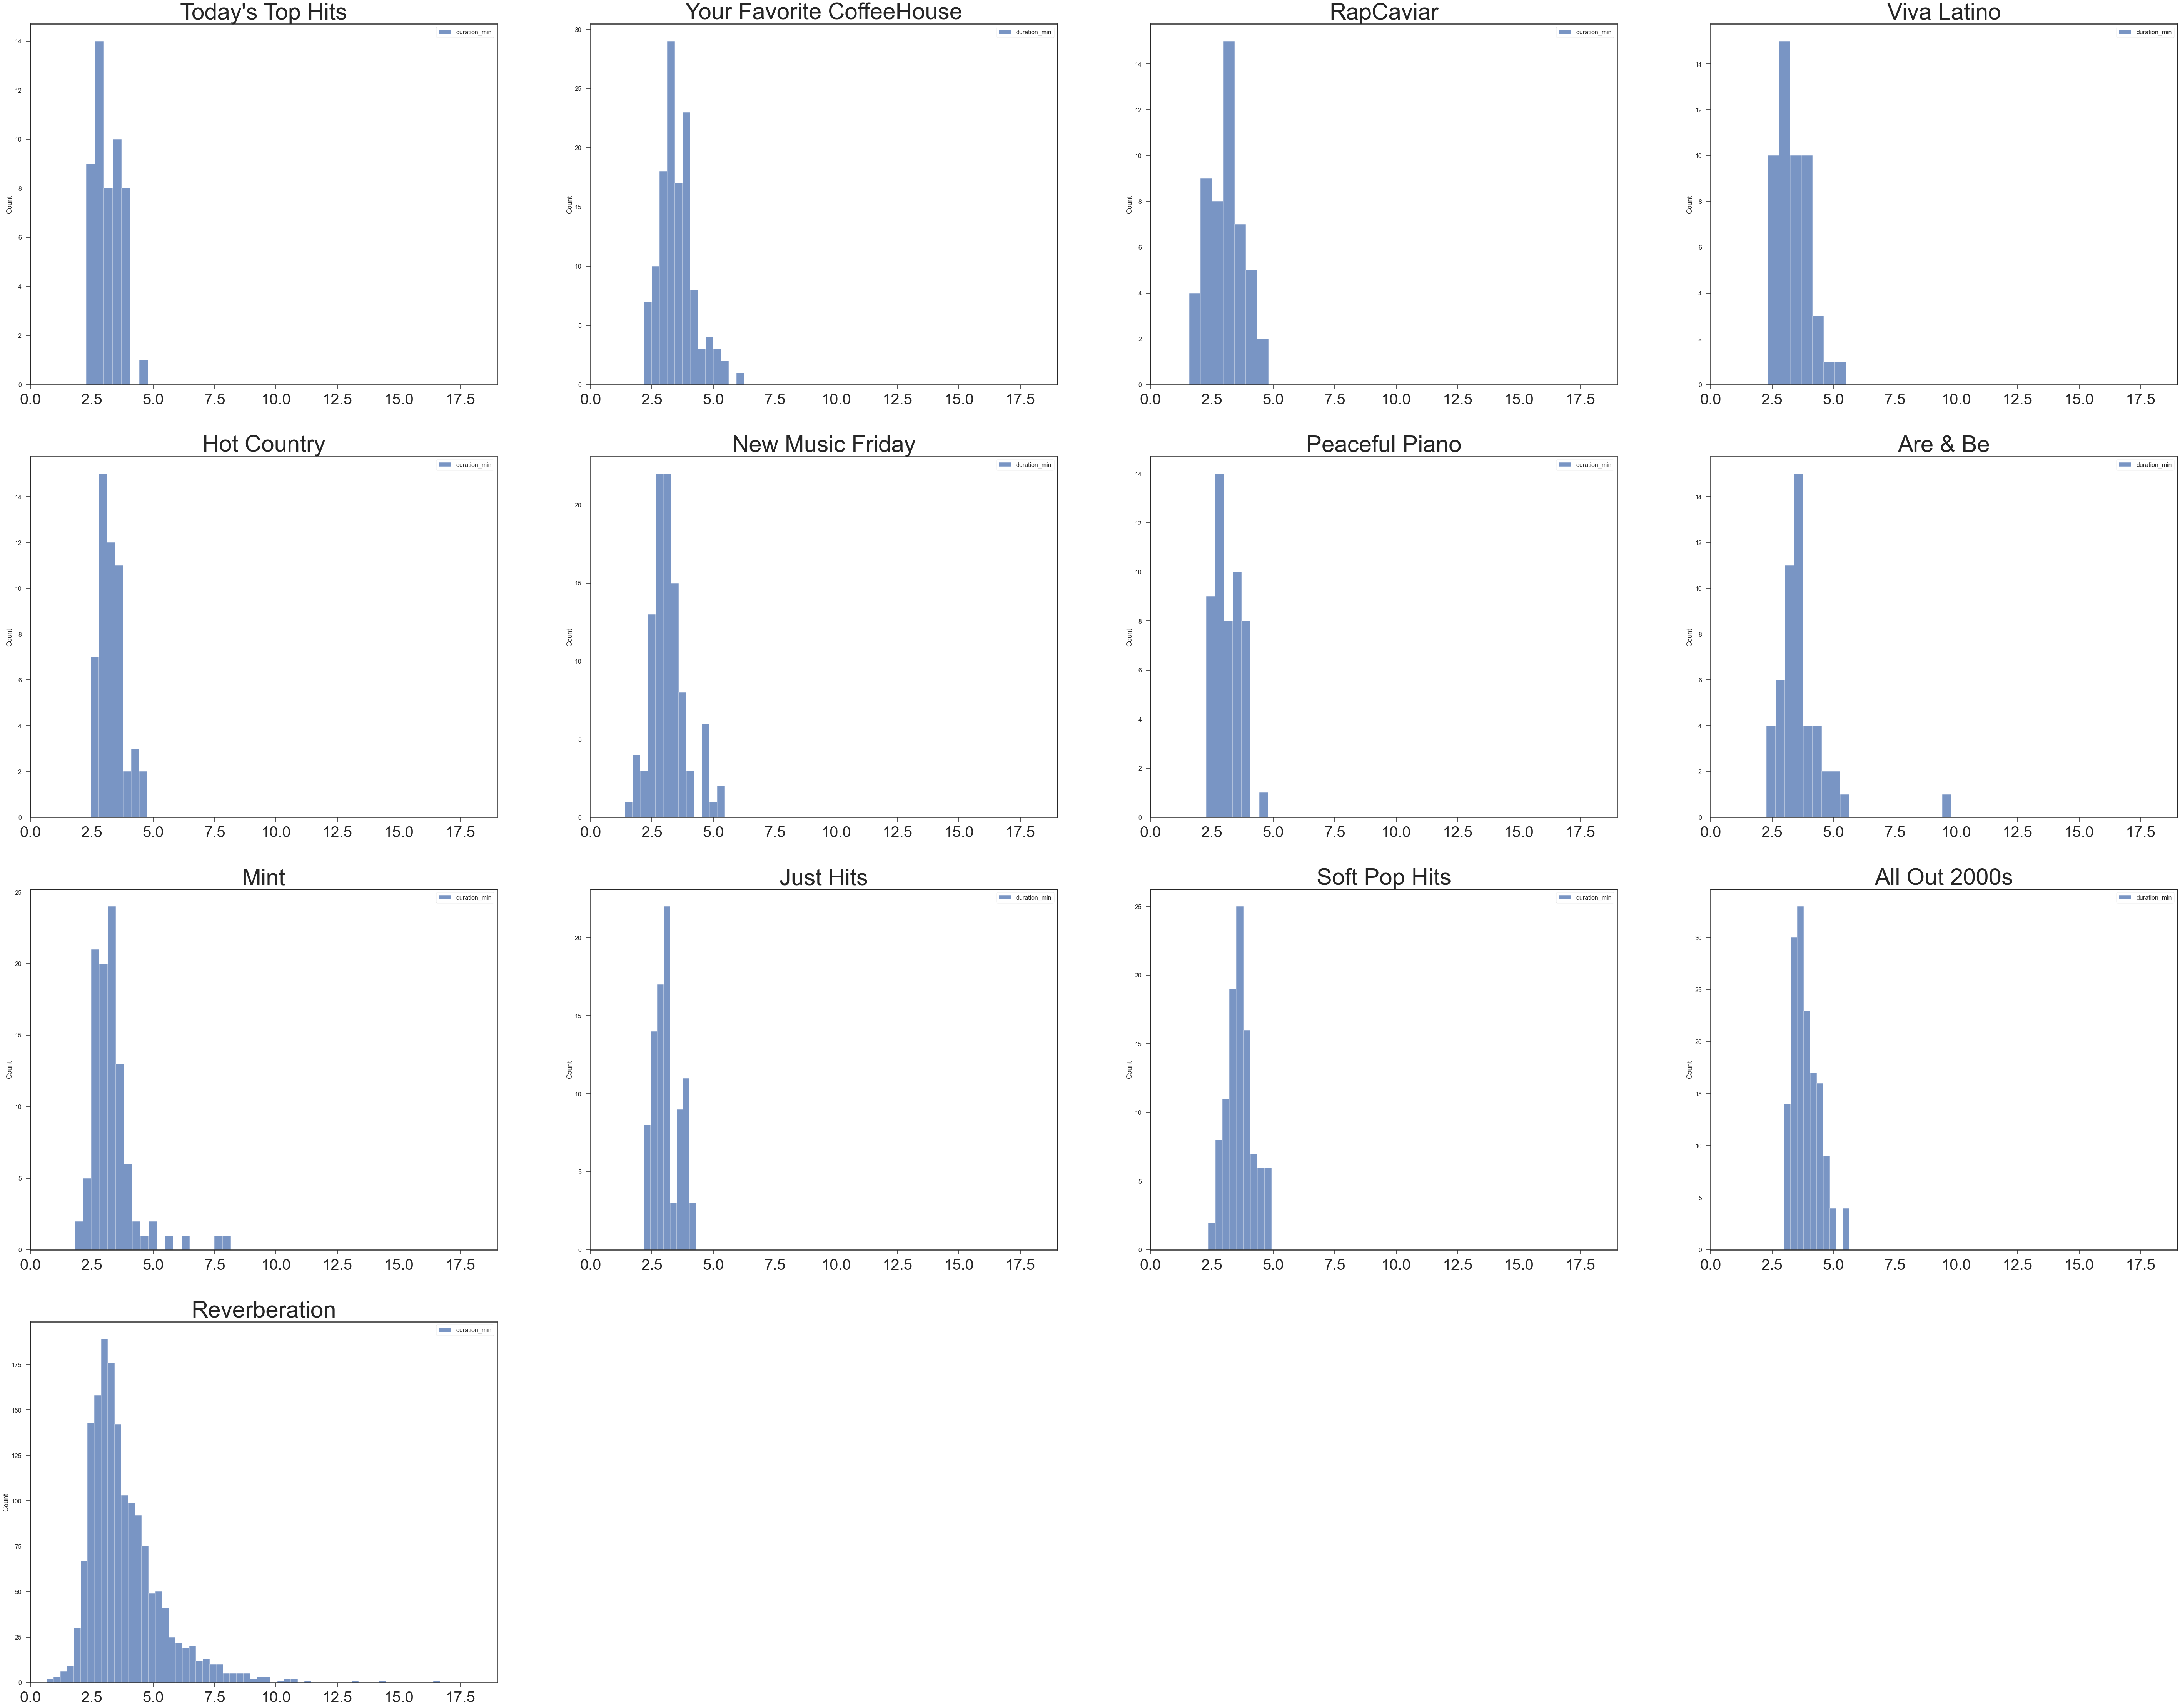

In [112]:
pls = df['playlist'].unique().tolist()
duration_df = df[['playlist','duration_min']]

#Create figure
#fig, axes = plt.subplots(4,4,figsize=(100,100),sharex=True)
fig=plt.figure(figsize=(100,100))
#Add one subplot with distinct color mapping for each individual playlist
for i,pl in enumerate(pls,1):

    #Process data for each playlist & create values
    data = duration_df.loc[duration_df['playlist']==pl,:]
    ax = fig.add_subplot(5,4,i)
    #Plot
    sns.histplot(data=data,cbar_ax=ax,cbar_kws=pl_mapping[pl])
    plt.title(pl,size=60)
    plt.xticks(size=40)
    plt.xlim([0,19])
        
plt.show()

### Radar charts to explore audio features across playlists
#### Normalisation

Most audio feature variables range from 1 to 0. For the others, we'll use a scaling technique to transform their range between 0 to 1. Effectively, normalizing the scale of all audio feature variables for comparison purposes.

In [113]:
#Selection of variable to normalize
normalization_cols=['speechiness','loudness','tempo','duration_ms']
norm_cols=[col+'_norm' for col in normalization_cols]
#Normalization
df[norm_cols] = MinMaxScaler().fit_transform(df[normalization_cols])
df.columns

Index(['playlist', 'id', 'name', 'album', 'artist', 'genres', 'release_date',
       'popularity', 'acousticness', 'danceability', 'energy', 'valence',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'duration_ms', 'mode', 'type', 'year',
       'release_decade', 'style', 'duration_min', 'speechiness_norm',
       'loudness_norm', 'tempo_norm', 'duration_ms_norm'],
      dtype='object')

In [114]:
#Snippet to delete unwanted cols during development phase
#to_del = [col for col in df.columns.values if '_norm' in col]
#df.drop(columns=to_del,axis=1,inplace=True)

#### Compute Centrality (Mean) of each audio feature per playlist.

In [115]:
labels = np.array(['popularity', 'danceability','energy', 'loudness_norm', 'tempo_norm' , 'valence'
                   , 'instrumentalness','speechiness_norm' , 'acousticness', 'liveness', 'duration_ms_norm'])

#Resource to set precision: https://www.codegrepper.com/code-examples/python/pandas+format+float+decimal+places
pd.set_option("display.precision", 3)
df_playlist_agg = df.groupby('playlist')[labels].mean()
df_playlist_agg

popularity  danceability  energy  loudness_norm  \
playlist                                                                     
All Out 2000s                  60.753         0.691   0.740          0.887   
Are & Be                       72.040         0.613   0.565          0.818   
Hot Country                    67.346         0.555   0.722          0.876   
Just Hits                      81.276         0.673   0.729          0.878   
Mint                           64.970         0.683   0.776          0.860   
New Music Friday               50.020         0.627   0.632          0.840   
Peaceful Piano                 86.280         0.690   0.635          0.857   
RapCaviar                      74.660         0.769   0.586          0.832   
Reverberation                  18.419         0.560   0.547          0.709   
Soft Pop Hits                  65.790         0.566   0.478          0.817   
Today's Top Hits               86.280         0.690   0.635          0.857   
Viva Latino                    83.360         0.730   0.714          0.908   
Your Favorite CoffeeHouse      39.096         0.542   0.282          0.648   

                           tempo_norm  valence  instrumentalness  \
playlist                                                           
All Out 2000s                   0.447    0.621         8.256e-03   
Are & Be                        0.409    0.445         1.224e-03   
Hot Country                     0.457    0.544         1.532e-04   
Just Hits                       0.445    0.538         4.826e-03   
Mint                            0.485    0.479         1.798e-01   
New Music Friday                0.496    0.485         4.201e-02   
Peaceful Piano                  0.453    0.554         1.365e-03   
RapCaviar                       0.499    0.420         1.543e-04   
Reverberation                   0.443    0.609         2.432e-01   
Soft Pop Hits                   0.420    0.343         2.675e-03   
Today's Top Hits                0.453    0.554         1.365e-03   
Viva Latino                     0.501    0.648         3.385e-04   
Your Favorite CoffeeHouse       0.413    0.347         5.281e-02   

                           speechiness_norm  acousticness  liveness  \
playlist                                                              
All Out 2000s                         0.107         0.113     0.173   
Are & Be                              0.134         0.273     0.186   
Hot Country                           0.038         0.186     0.183   
Just Hits                             0.068         0.127     0.163   
Mint                                  0.073         0.076     0.158   
New Music Friday                      0.130         0.230     0.171   
Peaceful Piano                        0.111         0.241     0.171   
RapCaviar                             0.311         0.100     0.166   
Reverberation                         0.046         0.400     0.179   
Soft Pop Hits                         0.047         0.480     0.138   
Today's Top Hits                      0.111         0.241     0.171   
Viva Latino                           0.119         0.224     0.173   
Your Favorite CoffeeHouse             0.021         0.777     0.132   

                           duration_ms_norm  
playlist                                     
All Out 2000s                         0.201  
Are & Be                              0.187  
Hot Country                           0.164  
Just Hits                             0.153  
Mint                                  0.166  
New Music Friday                      0.156  
Peaceful Piano                        0.154  
RapCaviar                             0.149  
Reverberation                         0.198  
Soft Pop Hits                         0.186  
Today's Top Hits                      0.154  
Viva Latino                           0.168  
Your Favorite CoffeeHouse             0.179

In [116]:
avg_pop_rev = df_playlist_agg[df_playlist_agg.index.isin(['Reverberation'])].popularity.values[0]
avg_pop_others = np.mean(df_playlist_agg[~(df_playlist_agg.index.isin(['Reverberation']))].popularity.values)
print(f'Reverberation avg popularity is {avg_pop_rev:.2f}')
print(f'Other playlists avg popularity is {avg_pop_others:.2f}')
print(f'or a difference of {(avg_pop_rev-avg_pop_others)/avg_pop_others:+.2%} popularity')

Reverberation avg popularity is 18.42
Other playlists avg popularity is 69.32
or a difference of -73.43% popularity


In [117]:
avg_val_rev = df_playlist_agg[df_playlist_agg.index.isin(['Reverberation'])].valence.values[0]
avg_val_others = np.mean(df_playlist_agg[~(df_playlist_agg.index.isin(['Reverberation']))].valence.values)
print(f'Reverberation avg valence is {avg_val_rev:.2f}')
print(f'Other playlists avg valence is {avg_val_others:.2f}')
print(f'or a difference of {(avg_val_rev-avg_val_others)/avg_val_rev:+.2%} valence')

Reverberation avg valence is 0.61
Other playlists avg valence is 0.50
or a difference of +18.19% valence


#### Build radar chart

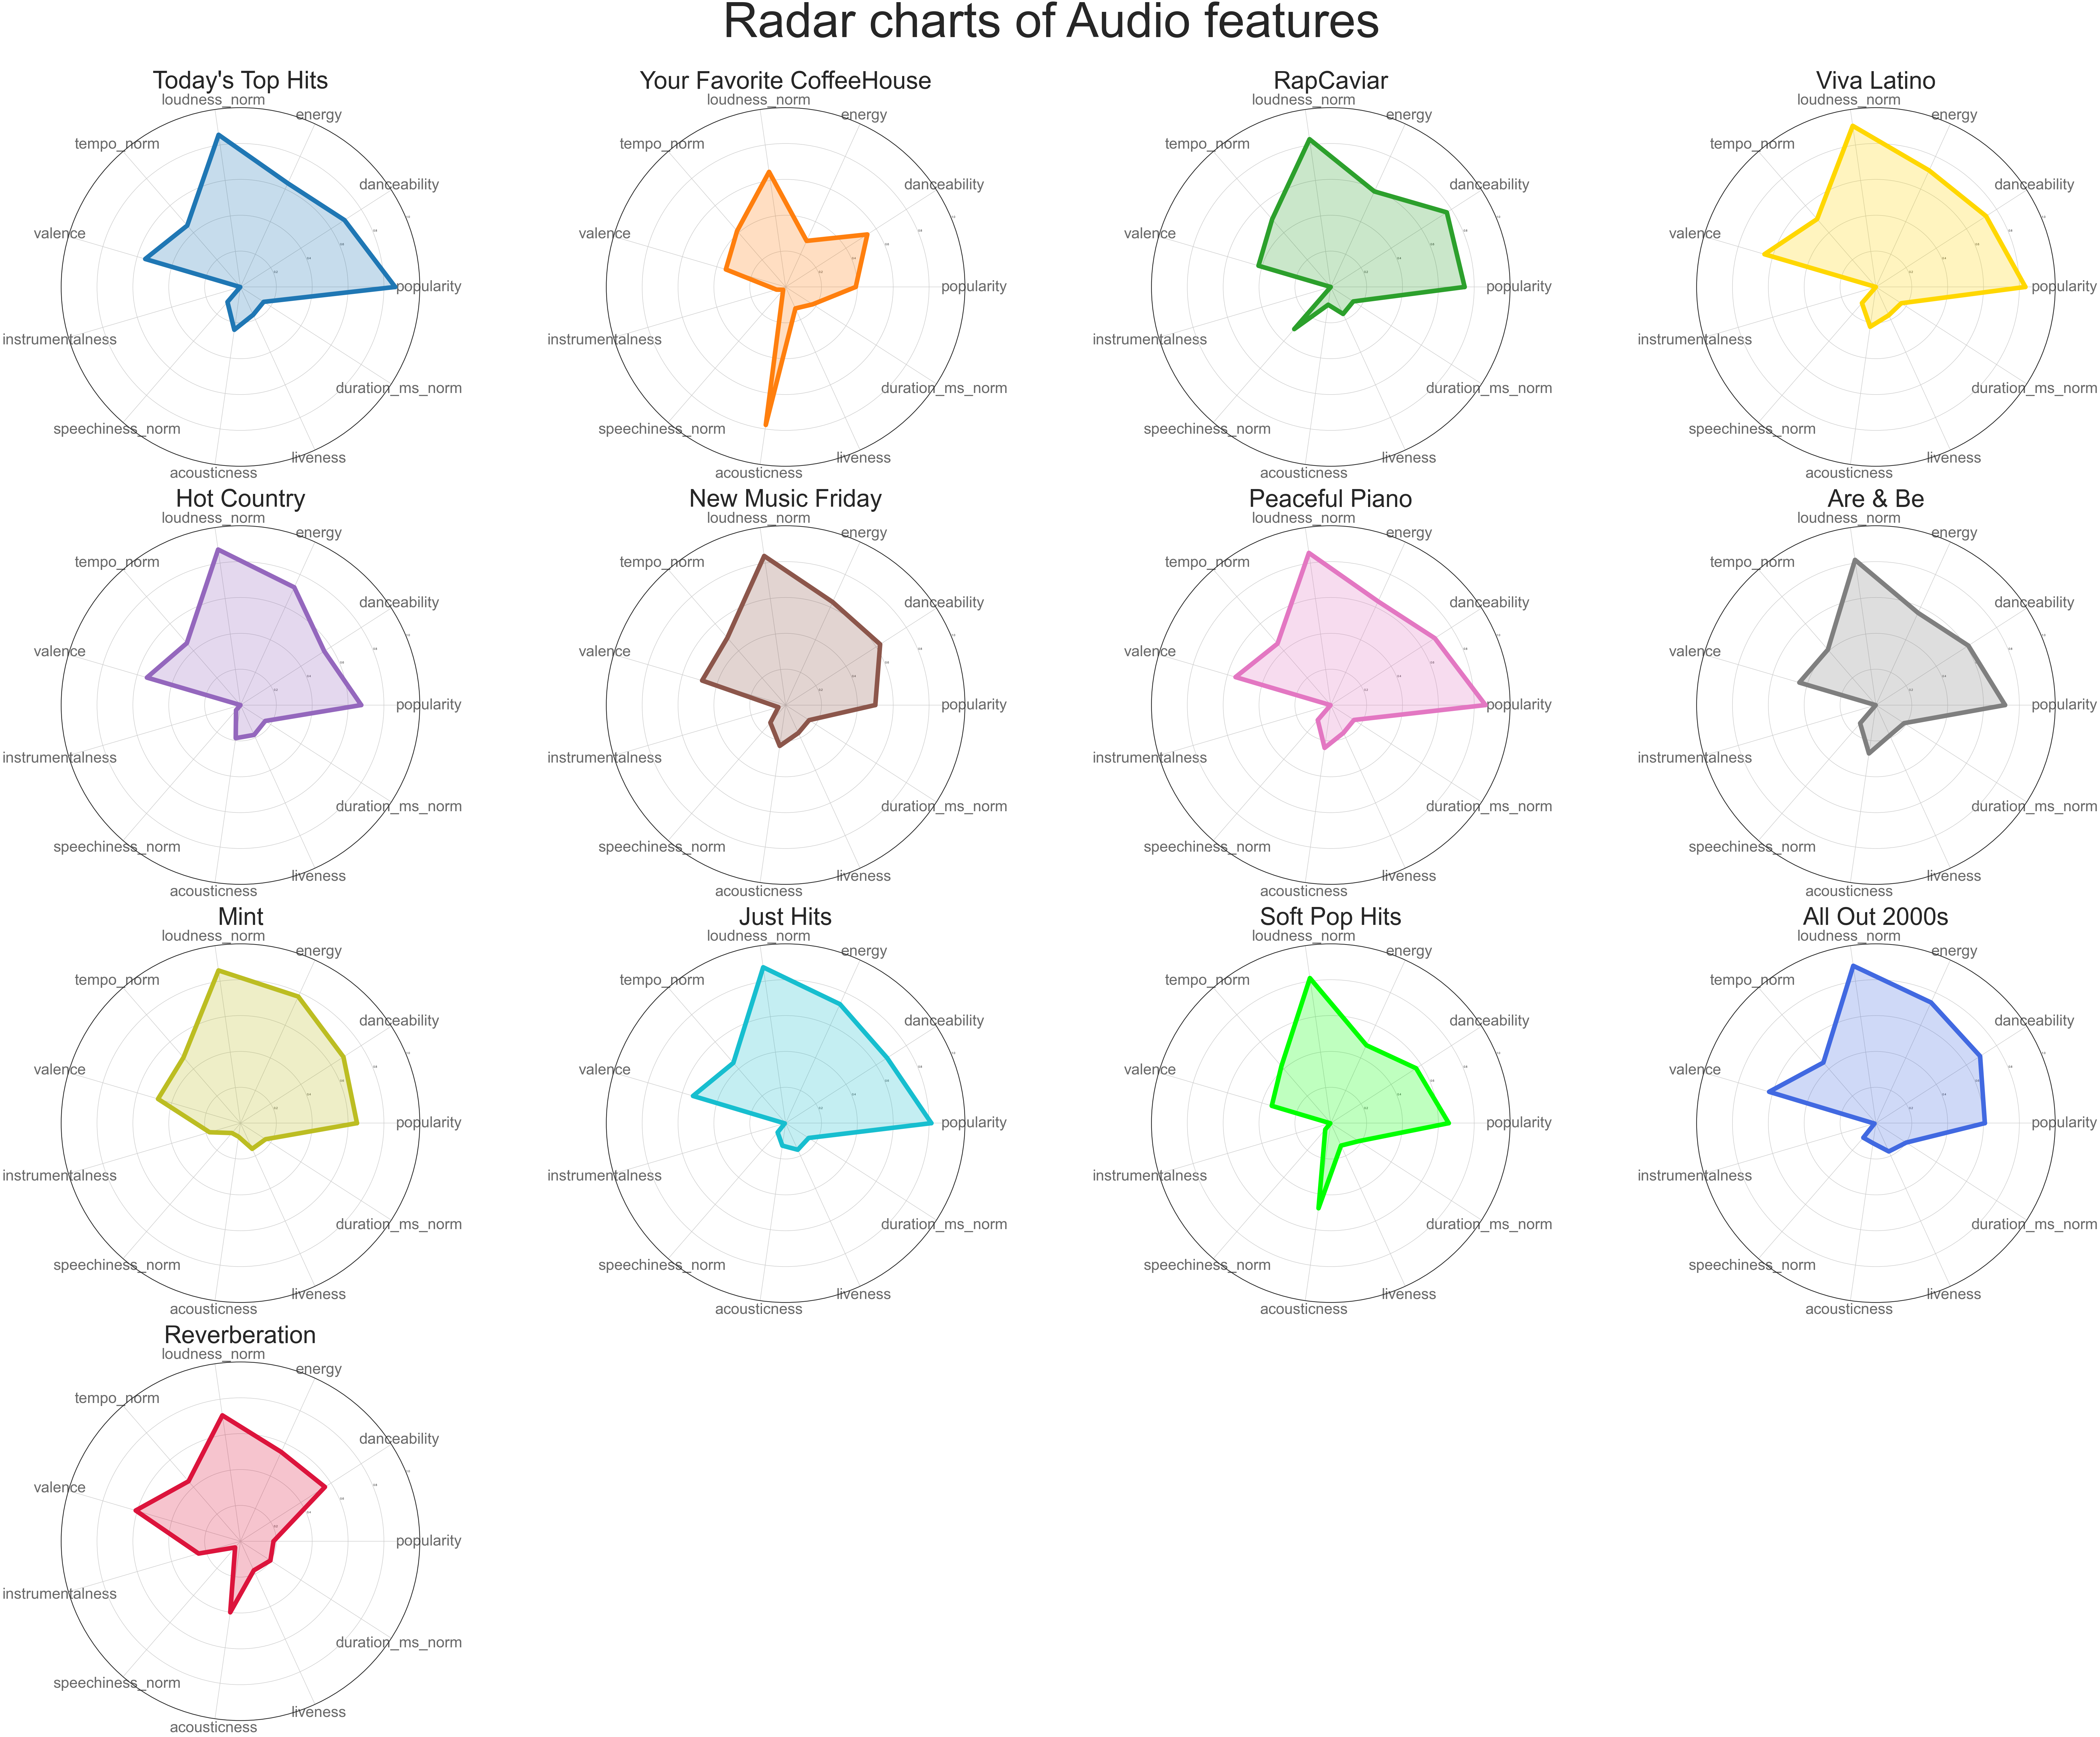

In [118]:

pls = df['playlist'].unique().tolist()

#Create figure
fig=plt.figure(figsize=(100,100))
#Add one subplot with distinct color mapping for each individual playlist
for index_subplot,pl in enumerate(pls,1):

    #Process data for each playlist & create values
    stats = df.loc[df.playlist==pl,labels].mean()
    stats.popularity = stats.popularity/100
    stats = stats.values
    #Create angles for radar
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    #Close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    #Built figure
    ax = fig.add_subplot(5,4,index_subplot, polar=True)
    plt.tight_layout()
    #Plot
    ax.plot(angles, stats, 'o-', linewidth=15, color=pl_mapping[pl])
    ax.fill(angles, stats, pl_mapping[pl], alpha=0.25)
    #Set axis & legend
    fig.suptitle('Radar charts of Audio features \n', fontsize=160)
    ax.set_thetagrids(angles * 180/np.pi)
    plt.xticks(angles[:-1], labels, color='dimgrey', size=50)
    plt.yticks(size=10)
    ax.set_ylim(0,1)
    ax.set_title(df.loc[df.playlist==pl,'playlist'].iloc[0])
    ax.title.set_size(80)
    ax.grid(True)

#EXPORT graph to explore in details
#plt.savefig('SxR_radar_charts.png', format='png', orientation='landscape')
plt.show()

#### Analysis - Audio Features: <a name='3.1'></a>

Technical:
   * See Appendix for details definition of each audio feature above.
   * Radar charts are somehow controversial as the variable orders may influence the area shape and the viewers evaluation. However, they are useful to directionally guide us in defining the unique characteristics of each playlist.
   
On Reveberation:
   * Reverberation playlist seems to have a high <b>valence</b> - which measure the "happiness" of a track - with a mean of 0.609 or the 3rd highest. Knowing the playlist, it does make sense as their selection truly generate a sensation of well-being while exploring a broad range of genres.<br><br>
   * Another characterics of Reverberation is its extremely low <b>Popularity</b> - with a mean of 18 or by far the lowest of the list. FYI - the average popularity of other playlist is 69. Once again, this is not surprising as their trademark is to find hidden gems. Even as a music collector, Reveberation keeps on surprising me every time by fidding extremely satisfying but rare, or unknown, tracks.<br><br>
   * Finally, Reveberation is one of the playlist with the highest average <b>acousticness</b> and <b>instrumentalness</b>. As well as a right skewed distribution of track <b>duration</b> - being the only playlist composed of numerous tracks longer than 5min. All of the above makes me conclude that its main audience is most probably directed to listeners with a more advanced musical knowledge. Often it translates with songs which focuses on elaborated sonic environment. 
   
<a href='#00'>(Go to Table of Content)</a>

---
## 4. Appendix <a name='4'></a>

### 4.1. Spotify Audio Features definitions:
in order of appearence:

* <b>Popularity</b>: is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.<br><br>

* <b>Danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br><br>

* <b>Energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.<br><br>

* <b>Loudness</b>: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br><br>

* <b>Tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br><br>

* <b>Valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br><br>

* <b>Instrumentalness</b>: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br><br>

* <b>Speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br><br>

* <b>Acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br><br>

* <b>Liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.<br><br>

* <b>Mode</b>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

---
### 4.2. Further exploration: Pairplot for continuous variables
Resources: https://seaborn.pydata.org/generated/seaborn.pairplot.html

Pairplot helps discovering the relationships in continuous variables by creating a scatter plot for each pair as well as plotting the distribution for each variable.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

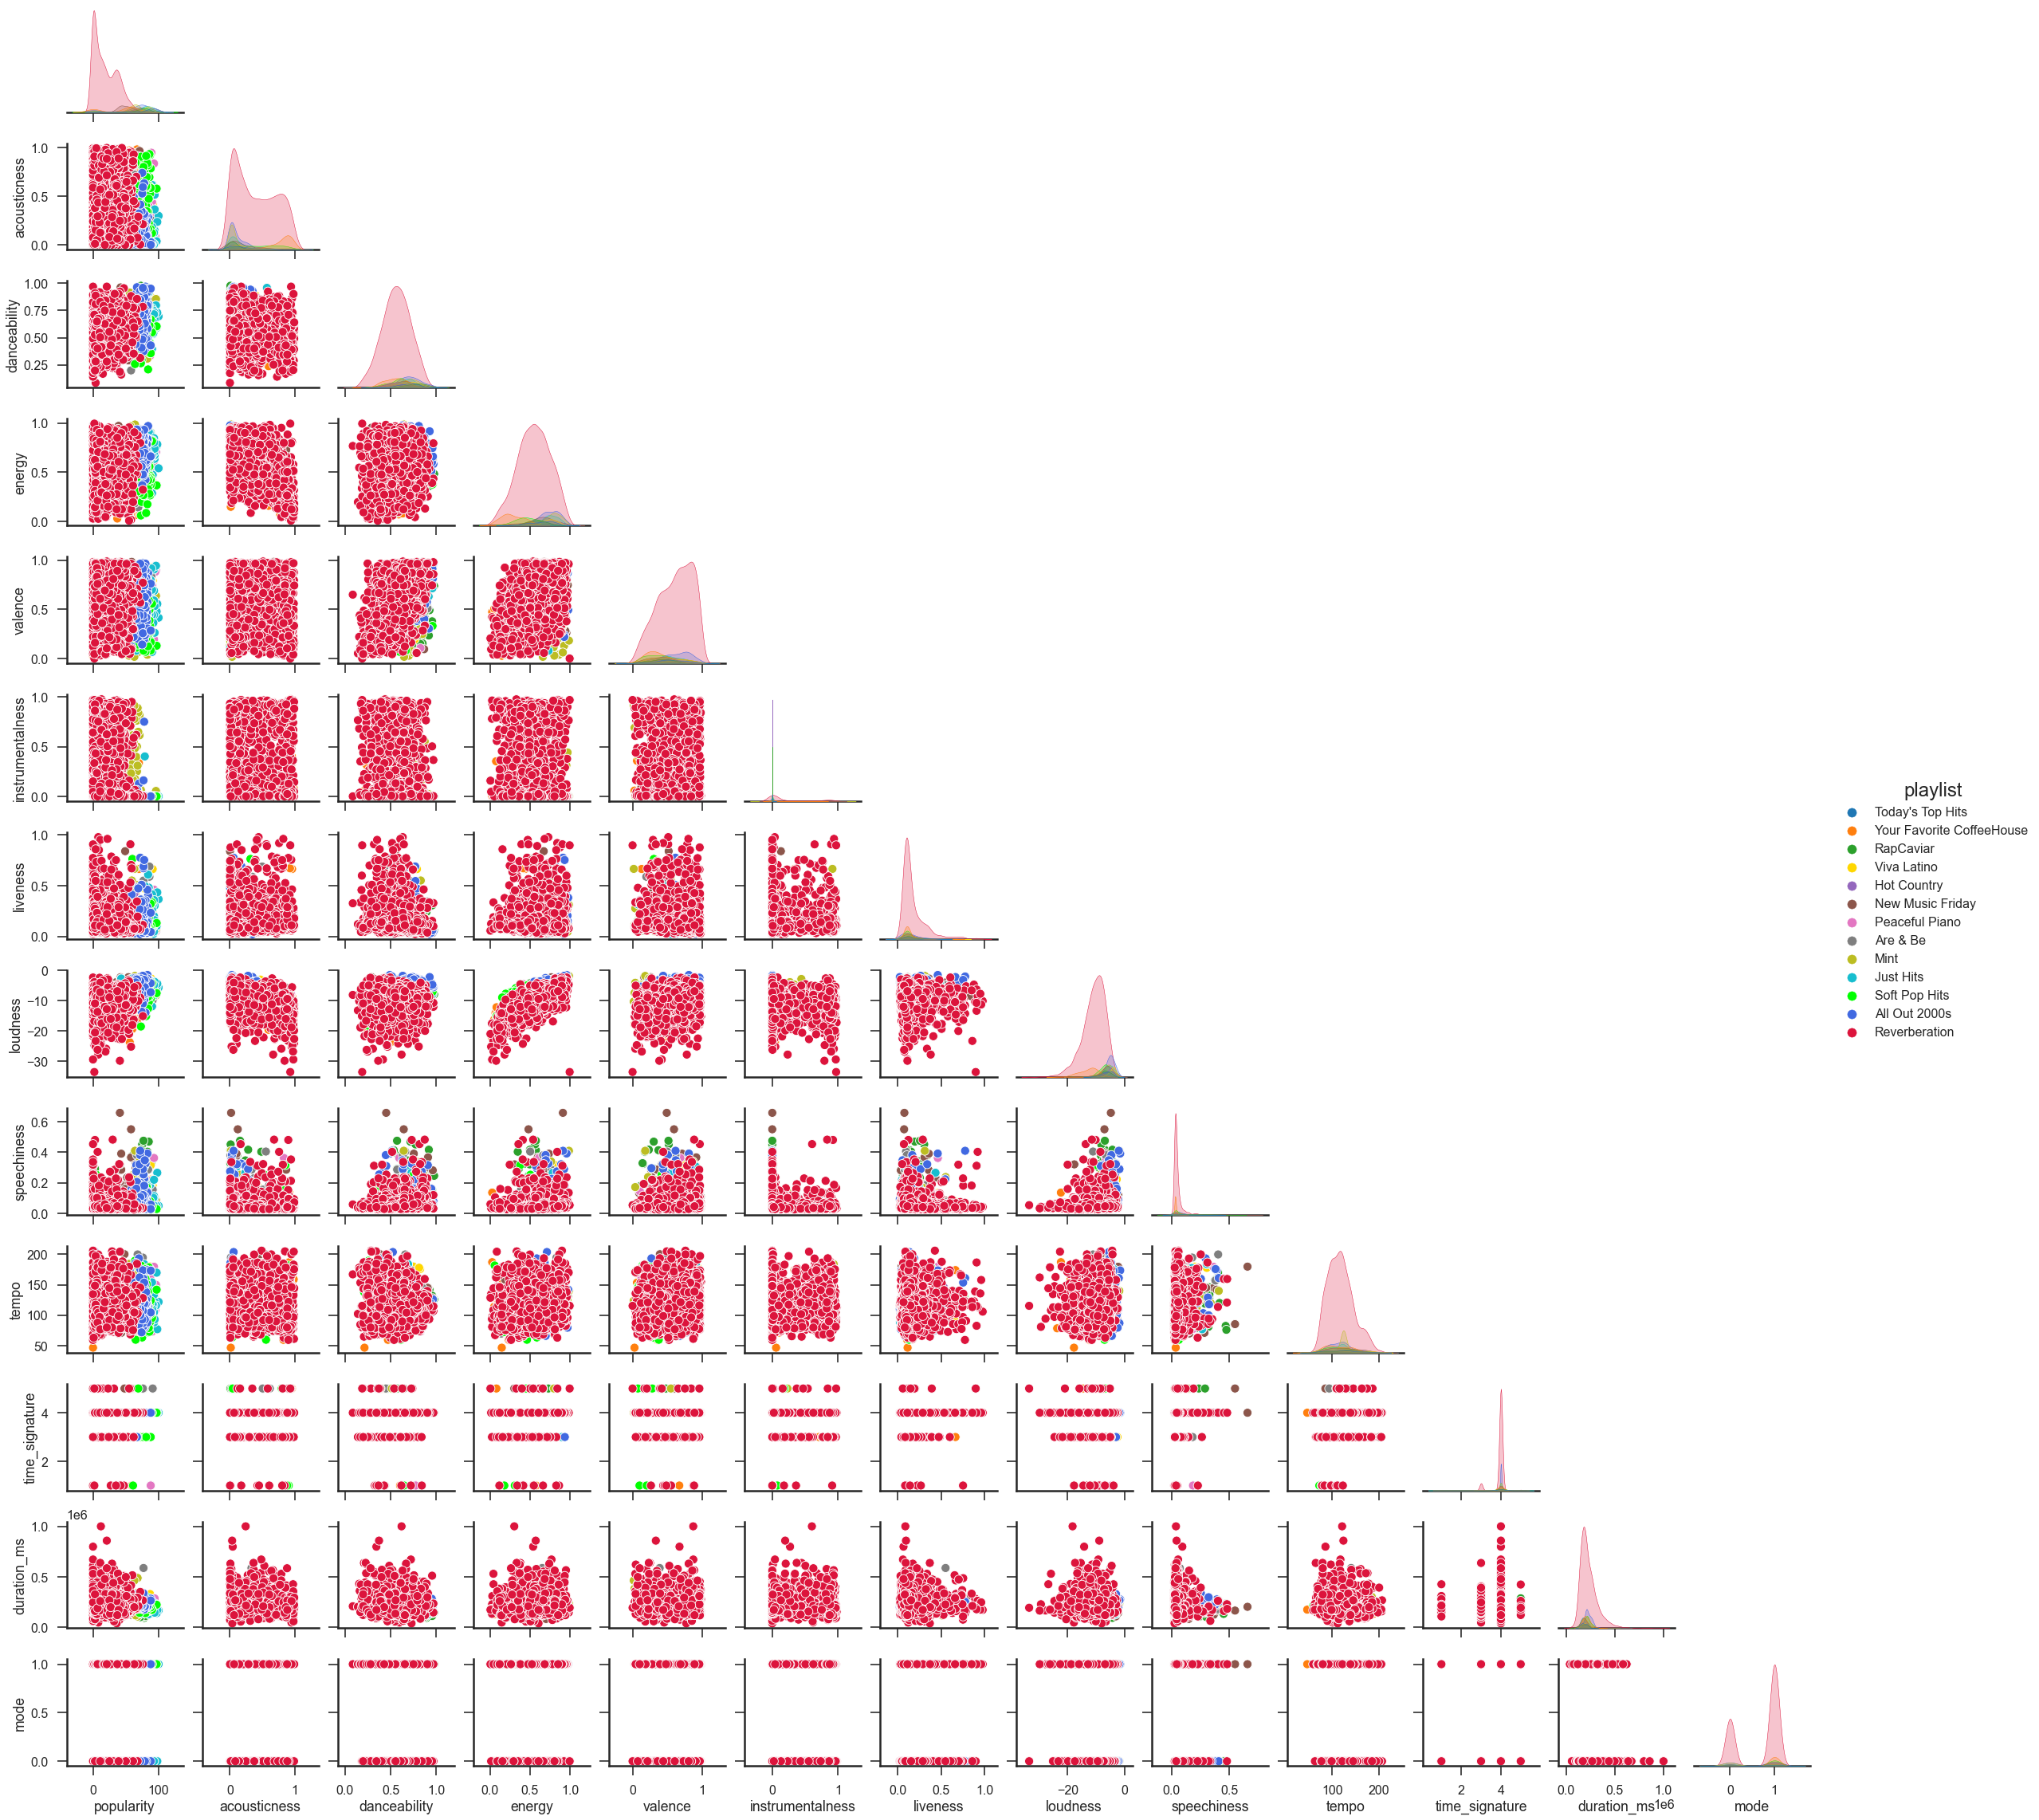

In [119]:
cols=continuous
cols.append('playlist')

#plt.figure(figsize=(24,8))
sns.pairplot(df[continuous],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
#plt.savefig('SxR_pairplot.png', format='png', orientation='landscape')
plt.show()

#### Notes:

   * The Reveberbaration playlist accounts for 60+% of all tracks in the dataset. Thus, it's preferable to visualize it separately. It also means that we may have imbalanced classes for classification models. We will develop this point later on.
   * Popularity seems to differentiate Reverberation from other playlists.
   * It's worth noting the positive linear correlation between Loudness and Energy. Othewise, there doesn't seem to have many strong linear correlation among other variables.

#### Pairplot for Reveberation only

In [120]:
#plt.figure(figsize=(24,8))
#sns.pairplot(df[df['playlist']=='Reverberation'][cols],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
#plt.savefig('SxR_pairplot_Reverberation.png', format='png', orientation='landscape')
#plt.show()

#### Pairplot for all playlists except Reverberation

In [121]:
#plt.figure(figsize=(24,8))
#sns.pairplot(df[df['playlist']!='Reverberation'][cols],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
#plt.savefig('SxR_pairplot_excl_R.png', format='png', orientation='landscape')
#plt.show()

<a href='#00'>(Go to Table of Content)</a>

---
### Exploratory Data Analysis part finished. 
### Next step see     [*Part 3 - Multli-class classifiers*](https://github.com/uzampogn/Spotify-x-Reverberation-The-essence-of-cool)